Multiple Logistic Regression, also known as Multivariate Logistic Regression, extends the concept of logistic regression to handle more than one independent variable (feature). It is used for binary classification tasks, just like simple logistic regression, but it allows you to consider multiple predictors when making predictions.

<img src="https://michael-fuchs-python.netlify.app/post/2019-11-15-multinomial-logistic-regression_files/p27s1.png" style="width:400px;height:200px;">
<h1 color="blue">Multinomial logistic regression</h1>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
digits.target_names[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<Figure size 640x480 with 0 Axes>

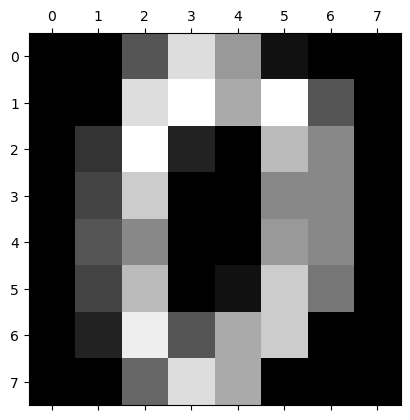

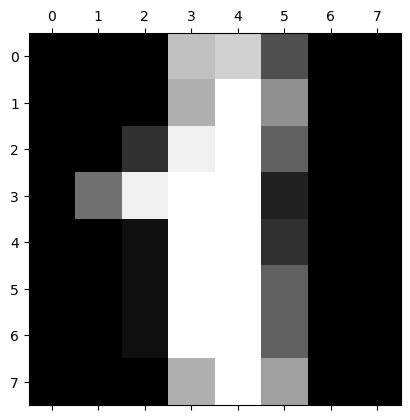

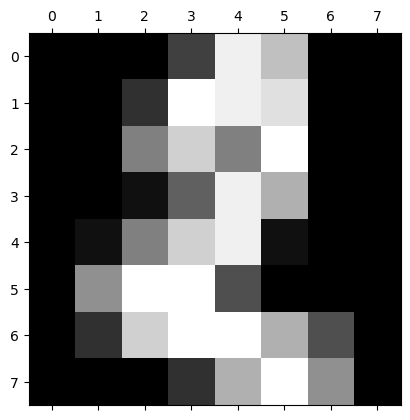

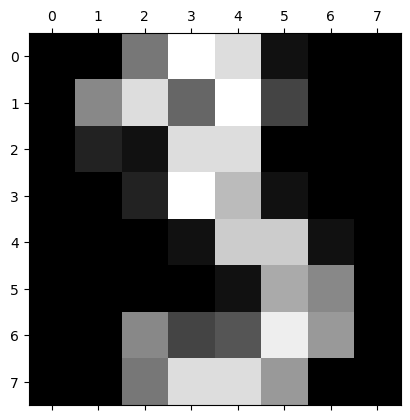

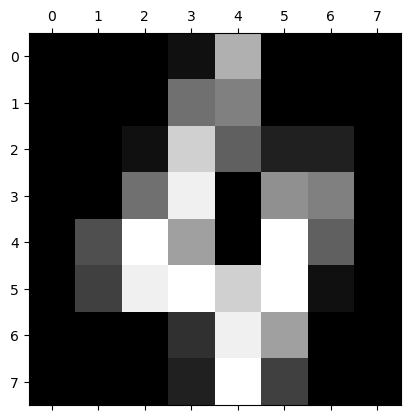

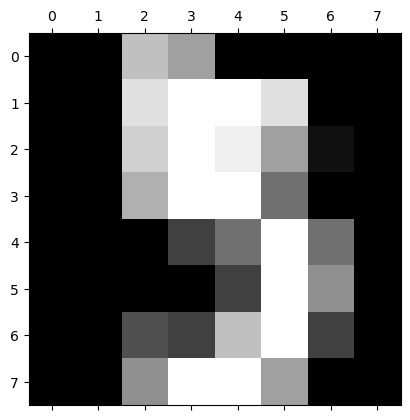

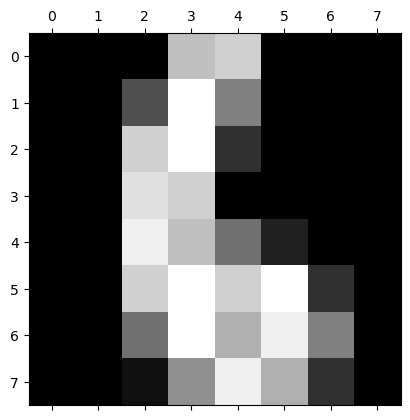

In [19]:
plt.gray()
for i in range(7):
    plt.matshow(digits.images[i])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.2)

In [23]:
len(x_train)

1437

In [24]:
len(x_test)

360

In [25]:
len(y_train)

1437

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(x_train,y_train)

C:\Users\Bezawada\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

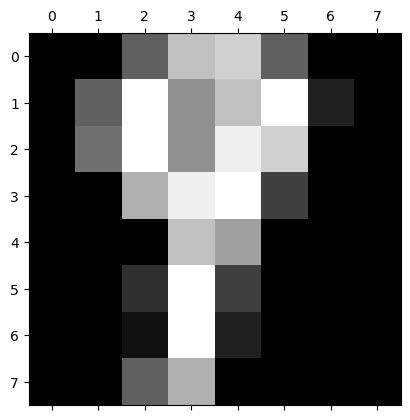

In [30]:
plt.matshow(digits.images[69])

In [32]:
digits.target[69]

9

In [34]:
model.predict([digits.data[69]])

array([9])

In [36]:
model.score(x_test,y_test)

0.9666666666666667

In [40]:
#to know where the model is doing misatkes we use confusion matrix
#also knowm as errir matrix

y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm =  confusion_matrix(y_test,y_predicted)
cm #cm appears to be the confusion matrix that you want to visualize. It should be a 2x2 NumPy array or a similar data structure containing the counts of true positives, true negatives, false positives, and false negatives.

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0,  2, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 38]], dtype=int64)

<h2> Seaborn is a data visualization library built on top of Matplotlib, and it provides a higher-level interface for creating aesthetically pleasing and informative statistical graphics. </h2>

Text(95.72222222222221, 0.5, 'Truth')

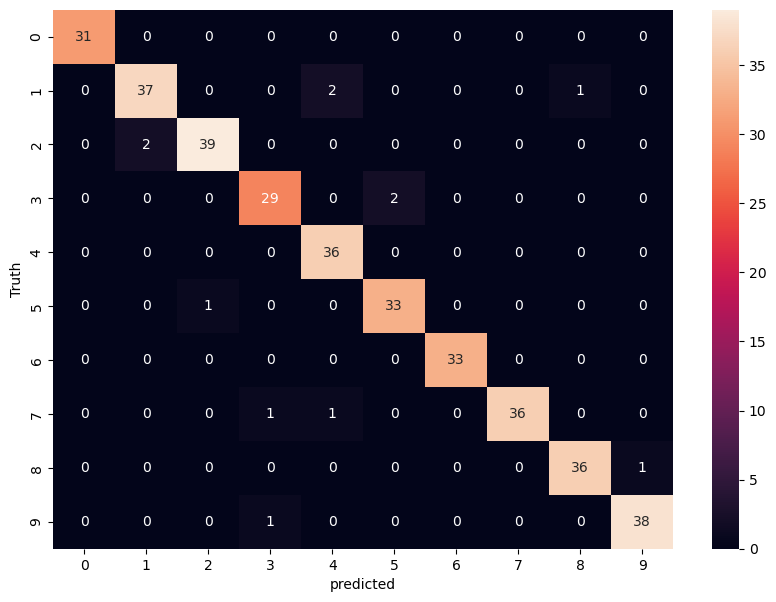

In [42]:
#seaborn liberary similat to matplotlib  udes for the visulization
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True) #annot=True specifies that you want to annotate the cells of the heatmap with the numeric values from the confusion matrix.
plt.xlabel('predicted')
plt.ylabel('Truth')       # 31 times the truth was 0 and the model predicted the zero

# 2 meams 2 times the truth was 2 but predicted as 1
# if there is no 0 in a particular that means the model is not working right